In [1]:
import pandas as pd
f=pd.read_csv('titanic_data.csv')
f.shape

(891, 12)

In [2]:
f.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
f.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [4]:
f = f[['Pclass','Fare','Survived','Sex','Age']]
f=f.dropna()
f.shape

(714, 5)

In [5]:
X = f[['Pclass','Fare']]
X.head()

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500


In [6]:
y = f['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)

(499, 2)
(215, 2)


In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6651162790697674

In [58]:
ans = lr.predict_proba([[3,0]])
ans[:]

array([[0.6410693, 0.3589307]])

In [59]:
ans = lr.predict_proba([[2,32.204208]])
ans[:]

array([[0.53509742, 0.46490258]])

In [60]:
ans = lr.predict_proba([[1,75]])
ans[:]

array([[0.42064983, 0.57935017]])

In [61]:
ans = lr.predict_proba([[1,300]])
ans[:]

array([[0.31573576, 0.68426424]])

In [12]:
f = pd.concat([f,pd.get_dummies(f['Sex'], prefix='Sex',
                                 dummy_na=True)],axis=1).drop(['Sex'],axis=1)
f.head()

,Pclass,Fare,Survived,Age,Sex_female,Sex_male,Sex_nan
0,3,7.2500,0,22.0,0,1,0
1,1,71.2833,1,38.0,1,0,0
2,3,7.9250,1,26.0,1,0,0
3,1,53.1000,1,35.0,1,0,0
4,3,8.0500,0,35.0,0,1,0


In [116]:
X = f[['Pclass','Fare','Sex_female','Sex_male']]
y = f['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=10)
print(scores)
import numpy as np
np.mean(scores)

[0.74509804 0.78       0.8        0.72       0.84       0.82
 0.9        0.72       0.85714286 0.73469388]


0.7916934773909563

In [18]:
lr.score(X_train,y_train)

0.7915831663326653

In [19]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7534883720930232

In [30]:
conf = sklm.confusion_matrix(y_test, y_pred)
print('                 Confusion matrix')
print('                          Survie           Die   ')
print('Actual Survie      %6d' % conf[0,0] + '            %5d' % conf[0,1] )
print('Actual Die          %6d' % conf[1,0] + '            %5d' % conf[1,1] )

                 Confusion matrix
                          Survie           Die   
Actual Survie         103               23
Actual Die              30               59


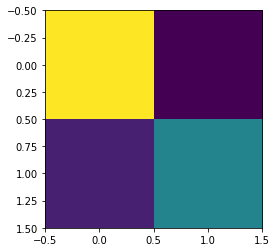

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(conf)

<h1> ลองใช้ NN ทำนายขำๆ

In [45]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [96]:
y_train.shape

(499,)

In [97]:
y_train.head()

37     0
58     1
57     0
94     0
209    1
Name: Survived, dtype: int64

In [104]:
y_train[1]

1

In [117]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [118]:
y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [119]:
y_train.shape

(499,)

In [120]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

2


In [110]:
y_train.shape

(499, 2)

In [166]:
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(4,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [167]:
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 499 samples, validate on 215 samples
Epoch 1/50
 - 1s - loss: 0.9150 - acc: 0.5010 - val_loss: 0.7874 - val_acc: 0.5860
Epoch 2/50
 - 0s - loss: 0.6240 - acc: 0.6493 - val_loss: 0.6463 - val_acc: 0.5860
Epoch 3/50
 - 0s - loss: 0.6151 - acc: 0.6693 - val_loss: 0.5736 - val_acc: 0.6884
Epoch 4/50
 - 0s - loss: 0.6115 - acc: 0.6794 - val_loss: 0.5422 - val_acc: 0.7442
Epoch 5/50
 - 0s - loss: 0.5587 - acc: 0.7194 - val_loss: 0.5300 - val_acc: 0.7674
Epoch 6/50
 - 0s - loss: 0.5263 - acc: 0.7475 - val_loss: 0.6971 - val_acc: 0.6372
Epoch 7/50
 - 0s - loss: 0.5585 - acc: 0.7595 - val_loss: 0.5078 - val_acc: 0.7628
Epoch 8/50
 - 0s - loss: 0.5362 - acc: 0.7695 - val_loss: 0.5299 - val_acc: 0.7628
Epoch 9/50
 - 0s - loss: 0.5752 - acc: 0.7435 - val_loss: 0.5035 - val_acc: 0.7674
Epoch 10/50
 - 0s - loss: 0.4972 - acc: 0.7816 - val_loss: 0.5143 - val_acc: 0.7535
Epoch 11/50
 - 0s - loss: 0.5224 - acc: 0.7715 - val_loss: 0.5307 - val_acc: 0.7535
Epoch 12/50
 - 0s - loss: 0.5845 - acc:

In [168]:
value = model.predict(X_test)
y_pred = np.argmax(value,axis=1)
y_true = np.argmax(y_test,axis=1)

In [169]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.7674418604651163